In [71]:
import pandas as pd
from glob import glob

raw_data = '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/'
files = sorted(glob(raw_data + '*.csv'))
files

['/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1000_tv_ratings_2021_Mar_01_1141.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1000_tv_ratings_2021_Mar_01_1206.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1000_tv_ratings_2021_Mar_01_1249.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1000_tv_ratings_2021_Mar_01_1315.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1001_tv_ratings_2021_Mar_12_1032.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1001_tv_ratings_2021_Mar_12_1156.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1002_tv_ratings_2021_Mar_15_1003.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1002_tv_ratings_2021_Mar_15_1031.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1002_tv_ratings_2021_Mar_15_1110.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1002_tv_ratings_2021_Mar_15_1135.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1003_tv_ratings_2021_Mar_22_1038.csv',

In [73]:
kjpos = []
kjneg = []
mlppos = []
mlpneg = []

for file in files:
    df = pd.read_csv(file,index_col=None,skiprows=[1,2,3,4,5],header=0,
                     usecols=['rating','participant','episode','rating_amplitude','rating_time'])
    df = df.iloc[:-2,:]
    df.index = pd.to_datetime(df['rating_time'],unit='s')
    subjid = df['participant'][0].astype(int)
    episode = df['episode'][0]
    rate = df['rating'][0]
    df = df.drop(['participant','episode','rating'],axis=1)
    print(subjid, episode, rate)
    df = df.resample('100ms').mean().round(1)
    #df.index = pd.to_datetime(df['rating_time'], unit='s').dt.strftime('%M:%S.%f')
    #df.index.name='time'
    df=df.drop(['rating_time'], axis=1)
    print(df.shape)
    df.columns=[str(subjid)]
    if episode == 'kj' and rate == 'Positive':
        kjpos.append(df)
    elif episode == 'kj' and rate == 'Negative':
        kjneg.append(df)
    elif episode == 'mlp' and rate == 'Positive':
        mlppos.append(df)
    elif episode == 'mlp' and rate == 'Negative':
        mlpneg.append(df)
        
kjpos = pd.concat(kjpos, axis=1)
kjneg = pd.concat(kjneg, axis=1)
mlppos = pd.concat(mlppos, axis=1)
mlpneg = pd.concat(mlpneg, axis=1)

1000 kj Positive
(12836, 1)
1000 mlp Positive
(12008, 1)
1000 kj Negative
(12836, 1)
1000 mlp Negative
(12008, 1)
1001 mlp Positive
(12055, 1)
1001 mlp Negative
(12029, 1)
1002 kj Negative
(12837, 1)
1002 mlp Negative
(12009, 1)
1002 kj Positive
(12836, 1)
1002 mlp Positive
(12008, 1)
1003 mlp Negative
(12008, 1)
1003 kj Negative
(12836, 1)
1003 mlp Positive
(12008, 1)
1003 kj Positive
(12836, 1)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


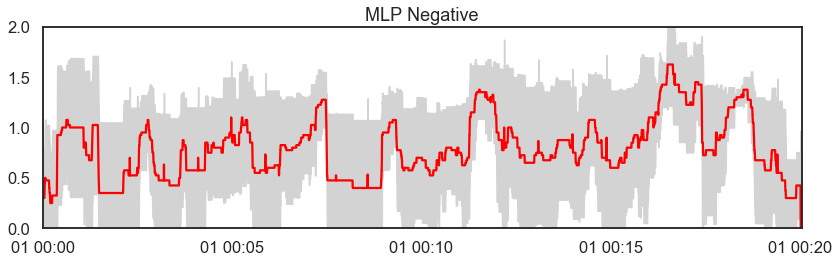

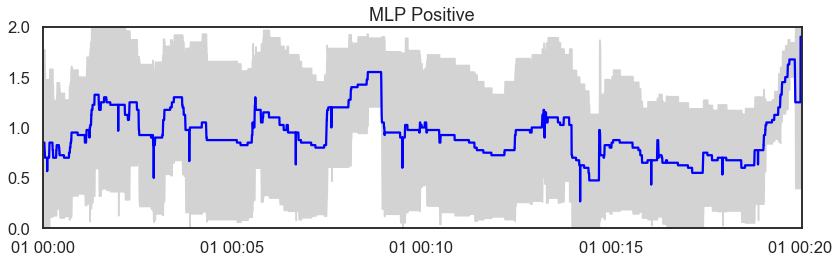

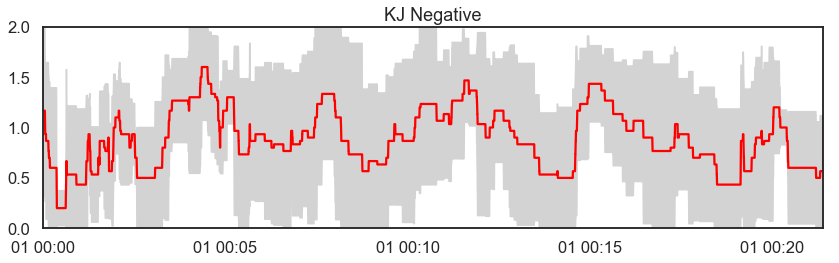

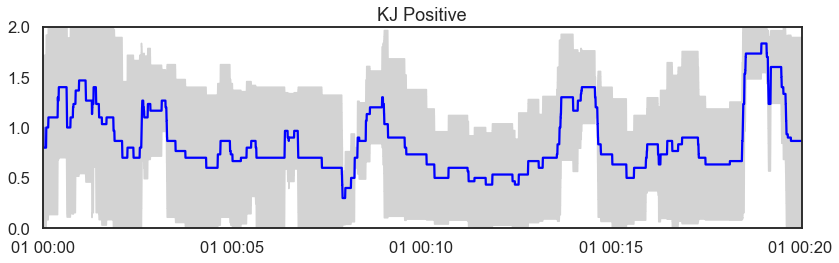

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='talk',style='white')

mean = mlpneg.mean(axis=1)
plt.figure(figsize=(12,4))
plt.fill_between(mean.index,mean-mlpneg.std(axis=1),mean+mlpneg.std(axis=1),color='lightgray')
plt.plot(mlpneg.index,mean,'k-',color='red')
plt.xlim((mlpneg.index[0],mlpneg.index[-1]))
plt.ylim((0,2))
plt.title('MLP Negative')
plt.tight_layout()
plt.savefig('mlp_neg.svg')
plt.show()
plt.close()

mean = mlppos.mean(axis=1)
plt.figure(figsize=(12,4))
plt.fill_between(mean.index,mean-mlppos.std(axis=1),mean+mlppos.std(axis=1),color='lightgray')
plt.plot(mlppos.index,mean,'k-',color='blue')
plt.xlim((mlppos.index[0],mlpneg.index[-1]))
plt.ylim((0,2))
plt.title('MLP Positive')
plt.tight_layout()
plt.savefig('mlp_pos.svg')
plt.show()
plt.close()

mean = kjneg.mean(axis=1)
plt.figure(figsize=(12,4))
plt.fill_between(mean.index,mean-kjneg.std(axis=1),mean+kjneg.std(axis=1),color='lightgray')
plt.plot(kjneg.index,mean,'k-',color='red')
plt.xlim((kjneg.index[0],kjneg.index[-1]))
plt.ylim((0,2))
plt.title('KJ Negative')
plt.tight_layout()
plt.savefig('kj_neg.svg')
plt.show()
plt.close()

mean = kjpos.mean(axis=1)
plt.figure(figsize=(12,4))
plt.fill_between(mean.index,mean-kjpos.std(axis=1),mean+kjpos.std(axis=1),color='lightgray')
plt.plot(kjpos.index,mean,'k-',color='blue')
plt.xlim((kjpos.index[0],mlpneg.index[-1]))
plt.ylim((0,2))
plt.title('KJ Positive')
plt.tight_layout()
plt.savefig('kj_pos.svg')
plt.show()
plt.close()